# Digital Audio Processing 2

Date: 2023/09/01

In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## DFT

$$X(k) = \sum_{n=0}^{N-1} x(n) exp(\frac{-j2 \pi kn}{N}) \qquad (0 \ge k \ge N-1)$$
$$x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) exp(\frac{j2 \pi kn}{N})  \qquad (0 \ge n \ge N-1)$$

### Expand X(k) usin Euler's formula

$$
X(k) = \sum_{n=0}^{N-1} (x_r(n) + j \, x_i(n)) (cos(\frac{-2 \pi kn}{N}) + j \, sin(\frac{-2 \pi kn}{N}))
$$
$$
= \sum_{n=0}^{N-1} (x_r(n) + j \, x_i(n)) (cos(\frac{2 \pi kn}{N}) - j \, sin(\frac{2 \pi kn}{N}))
$$
$$
= \sum_{n=0}^{N-1} (x_r(n) cos(\frac{2 \pi kn}{N}) + x_i(n) sin(\frac{2 \pi kn}{N}) + 
j \, (x_i(n) \, cos(\frac{2 \pi kn}{N}) - x_r(n) sin(\frac{2 \pi kn}{N}) ) )
$$

In [23]:
def dft(x):
    N = len(x)
    x_r = np.real(x)
    x_i = np.imag(x)
    X = np.zeros(N, dtype=np.complex128)
    
    for k in range(N):
        for n in range(N):
            theta = 2 * np.pi * k * n / N
            w_r = np.cos(theta)
            w_i = -np.sin(theta)
            X[k] += complex(w_r * x_r[n] - w_i * x_i[n], w_r * x_i[n] + w_i * x_r[n])
    return X

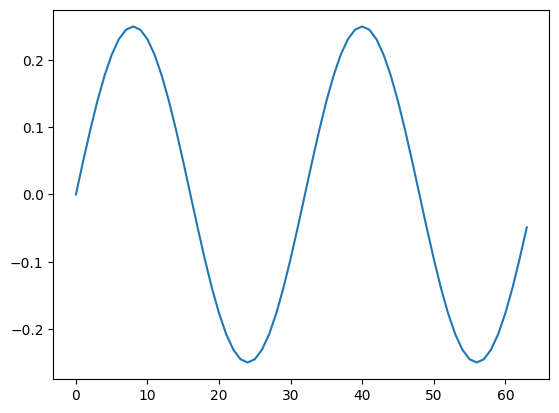

In [24]:
fs = 8000  # 8000Hz
f0 = 250  # 250Hz
N = 64
n = np.arange(64)
x = 0.25 * np.sin(2 * np.pi * f0 * n / fs)
plt.plot(x)

In [29]:
X = dft(x.astype(np.complex128))
AMP = np.abs(X)
THETA = np.angle(X)
THETA[AMP<1*10**-10] = 0.

<BarContainer object of 64 artists>

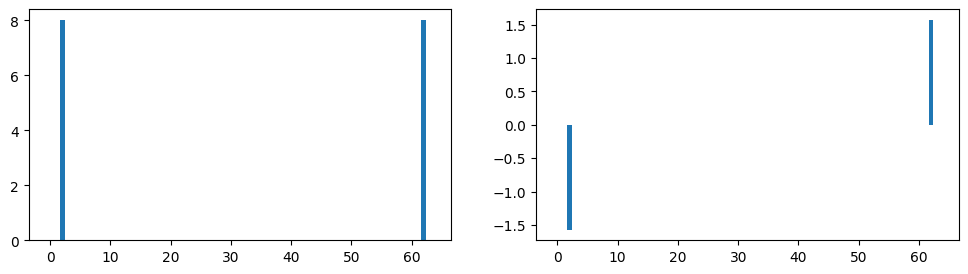

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].bar(n, AMP)
axes[1].bar(n, THETA)

/var/folders/_t/6t6dcyn14zb6p4jvvrgprd0m0000gn/T/ipykernel_82213/361402687.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(freq)
/var/folders/_t/6t6dcyn14zb6p4jvvrgprd0m0000gn/T/ipykernel_82213/361402687.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(freq)


<BarContainer object of 64 artists>

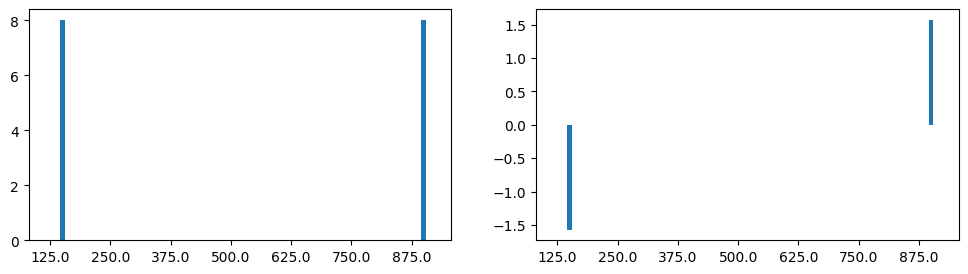

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
freq = n * fs / N
axes[0].set_xticklabels(freq)
axes[0].bar(n, AMP)
axes[1].set_xticklabels(freq)
axes[1].bar(n, THETA)